In [1]:
#Initialize matplotlib notebook
%matplotlib notebook

#Import needed packages
from pyuvdata import UVData
import numpy as np
import glob
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import matplotlib
import amp_delay_plotting as adp

#Create uv elements
uvxy = UVData()
uvyx = UVData()
uvxx = UVData()
uvyy = UVData()

#Define constants
#The speed of light, with power adjusted for desired units
c = 0.299792
#The speed of light in a cable correction factor
f = 0.83

#Create an array of antennas we want to flag
flagged_antennas = [0,2,26,50,98,136]


#Read in each of the data files

#Read in the xy data file
uvxy.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xy_time_split_data/combined_files/zen.grp1.of1.xy.LST.run_7.uvOCRSL.uvfits')
#Read in the yx data file
uvyx.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/yx_time_split_data/combined_files/zen.grp1.of1.yx.LST.run_8.uvOCRSL.uvfits')
#Read in the xx data file
uvxx.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_crosspol_time_split/xx_time_split_data/combined_files/zen.grp1.of1.xx.LST.run_2.uvOCRSL.uvfits')
#Read in the yy data file
uvyy.read_uvfits('/data6/HERA/data/IDR2.1/uvOCRSL_yy_time_split_data/combined_files/zen.grp1.of1.yy.LST.run_2.uvOCRSL.uvfits')

In [2]:
#Initialize the array for the amplitudes of the xy data and the corresponding delay
#The only required parameter is the uv object
max_amp_xy, delay_xy = adp.make_max_arrays(uv = uvxy)

#Print the shape of the arrays to verify that the function worked properly
print delay_xy.shape
print max_amp_xy.shape

#Initialize the matrix arrays of the xy data
#The arrays created above are passed into the function 
amp_matrix_xy, delay_matrix_xy = adp.make_matrix_array(amp_array = max_amp_xy, delay_array = delay_xy)

#Print the shape of the arrays to verify that the function worked properly
print amp_matrix_xy.shape
print delay_matrix_xy.shape

(1035, 3)
(1035, 3)
(45, 45)
(45, 45)


<IPython.core.display.Javascript object>


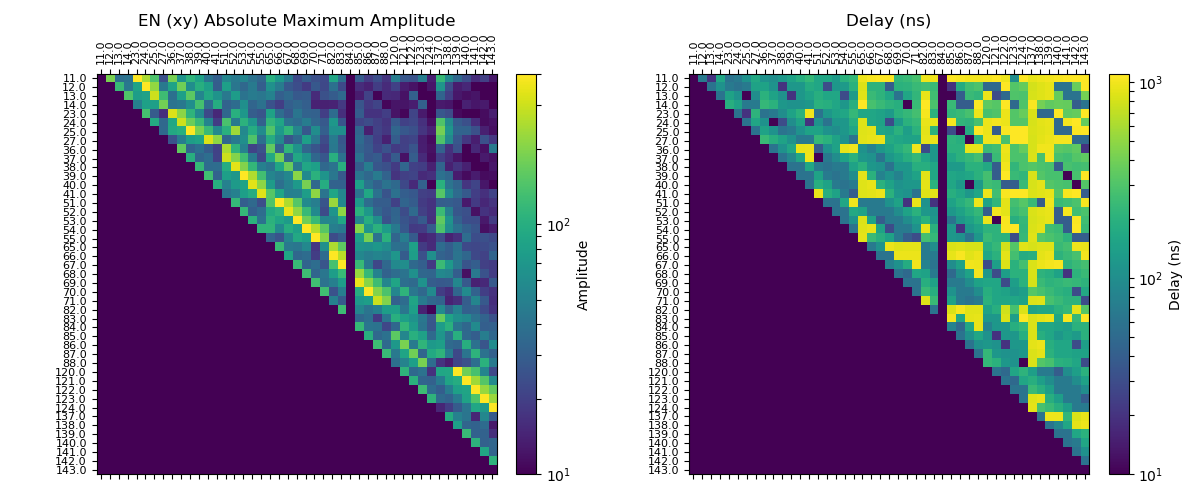

In [3]:
#Call the matrix plotting function

#The arrays created above are passed into the function
#The color scale for the second plot, which corresponds to the delay time, is passed through vmin and vmax
#The title of the plot is specified
adp.plot_matrix_array(amp_array = max_amp_xy, amp_matrix = amp_matrix_xy, delay_matrix = delay_matrix_xy,
                      vmin1 = 10, vmax1 = 400,
                      vmin2 = 10, vmax2 = 1100,
                      title='EN (xy) Absolute Maximum Amplitude')

In [4]:
#testing
'''
ant1 = 84
ant2 = 84

uvxx.read_uvfits('/data6/HERA/data/IDR2.1/2458098/zen.2458098.14043.xx.HH.uv.uvfits',antenna_nums=(ant1,ant2))
uvyy.read_uvfits('/data6/HERA/data/IDR2.1/2458098/zen.2458098.14043.yy.HH.uv.uvfits',antenna_nums=(ant1,ant2))

data = uvxx.get_data(ant1,ant2)
datay = uvyy.get_data(ant1,ant2)


data_ma = np.ma.array(data=data,mask=uvxx.flag_array)
datay_ma = np.ma.array(data=datay,mask=uvyy.flag_array)

plt.figure(figsize=(9,4))

plt.subplot(121)
plt.imshow(np.abs(data_ma), aspect='auto', norm=SymLogNorm(vmin=1,vmax=20,linthresh=0.1))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('XX .uv Amplitude')

plt.subplot(122)
plt.imshow(np.abs(datay_ma), aspect='auto', norm=SymLogNorm(vmin=1,vmax=20,linthresh=0.1))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('YY .uv Amplitude')

plt.tight_layout()
'''

In [7]:
#testing
'''
uvd = UVData()
uvda = UVData()


uvd.read_uvfits('/data6/HERA/data/IDR2.1/2458098/zen.2458098.14043.xx.HH.uvOR.uvfits',antenna_nums=(ant1,ant2))
uvda.read_uvfits('/data6/HERA/data/IDR2.1/2458098/zen.2458098.14043.yy.HH.uvOR.uvfits',antenna_nums=(ant1,ant2))

dataxx = uvd.get_data(ant1,ant2)
datayy = uvda.get_data(ant1,ant2)

dataxx_ma = np.ma.array(data=dataxx,mask=uvd.flag_array)
datayy_ma = np.ma.array(data=datayy,mask=uvd.flag_array)

plt.figure(figsize=(9,4))

plt.subplot(121)
plt.imshow(np.abs(dataxx_ma), aspect='auto', norm=SymLogNorm(vmin=1,vmax=20,linthresh=0.1))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('XX .uvOR Amplitude')

plt.subplot(122)
plt.imshow(np.abs(datayy_ma), aspect='auto', norm=SymLogNorm(vmin=1,vmax=20,linthresh=0.1))
plt.colorbar(label='Visibility Amplitude (Jy)')
plt.xlabel('Frequency (MHz)')
plt.ylabel('LST (hours)')
plt.title('YY .uvOR Amplitude')

plt.tight_layout()
'''

In [18]:
#Get the amplitudes for all antenna, including dead and flagged antenna
full_ant_amp_xy, full_ant_delay_xy = adp.make_blin_depd_arrays(uv = uvxy, keep_flags = True)
print full_ant_amp_xy.shape

#Create matrix of zeros
nants_peak = len(uvxy.antenna_numbers)
ant_matrix = np.zeros([nants_peak,nants_peak])

i = 0

for antenna in uvxy.antenna_numbers:
    #Step through every antenna and create matrix
    j = 0
    for ant1,ant2,peak in full_ant_amp_xy:
        #Creates matrix for the peaks of the specified antenna
        if ant1==antenna or ant2==antenna:
            ant_matrix[i,j] = peak
            j += 1
    i += 1
print ant_matrix.shape


avg_matrix = np.zeros([nants_peak,1])

#Take the average across the antennas
for i,peaks in enumerate(ant_matrix):
    #avg_matrix[0,i] = peaks[np.nonzero(peaks)].mean(axis=0)
    avg_matrix[i,0] = np.average(peaks,axis=0)

avg_matrix = avg_matrix/2
print avg_matrix.shape


(1378, 3)
(52, 52)
(52, 1)


<IPython.core.display.Javascript object>


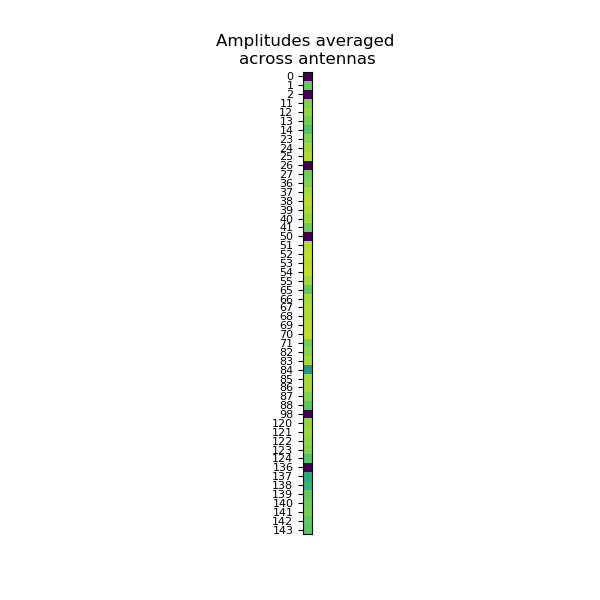

Text(0.5,1,'Amplitudes averaged \nacross antennas')

In [19]:
plt.figure(figsize=(6,6))

plt.imshow(np.abs(avg_matrix),norm=SymLogNorm(vmin=1,vmax=50,linthresh=.1))
plt.yticks(np.arange(len(uvxy.antenna_numbers)), uvxy.antenna_numbers, rotation='horizontal', fontsize=8)
plt.xticks([])
plt.title('Amplitudes averaged \nacross antennas')#,fontsize=8)

(52, 52)


Casting complex values to real discards the imaginary part


<IPython.core.display.Javascript object>


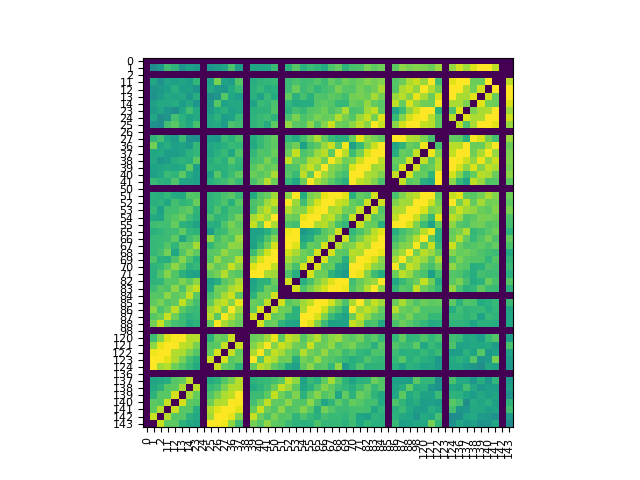

([<matplotlib.axis.XTick at 0x7fd9c0825550>,
 <a list of 52 Text xticklabel objects>)

In [36]:
test = np.fft.fft(np.fft.fft(ant_matrix,axis=1)).astype('float')
print test.shape

plt.figure()
plt.imshow(np.abs(test),norm=SymLogNorm(vmin=10,vmax=10000,linthresh=.1))
plt.yticks(np.arange(len(uvxy.antenna_numbers)), uvxy.antenna_numbers, rotation='horizontal', fontsize=8)
plt.xticks(np.arange(len(uvxy.antenna_numbers)), uvxy.antenna_numbers, rotation='vertical', fontsize=8)


(52, 52, 1024)
(52, 52, 1024)
(52, 1024)


<IPython.core.display.Javascript object>


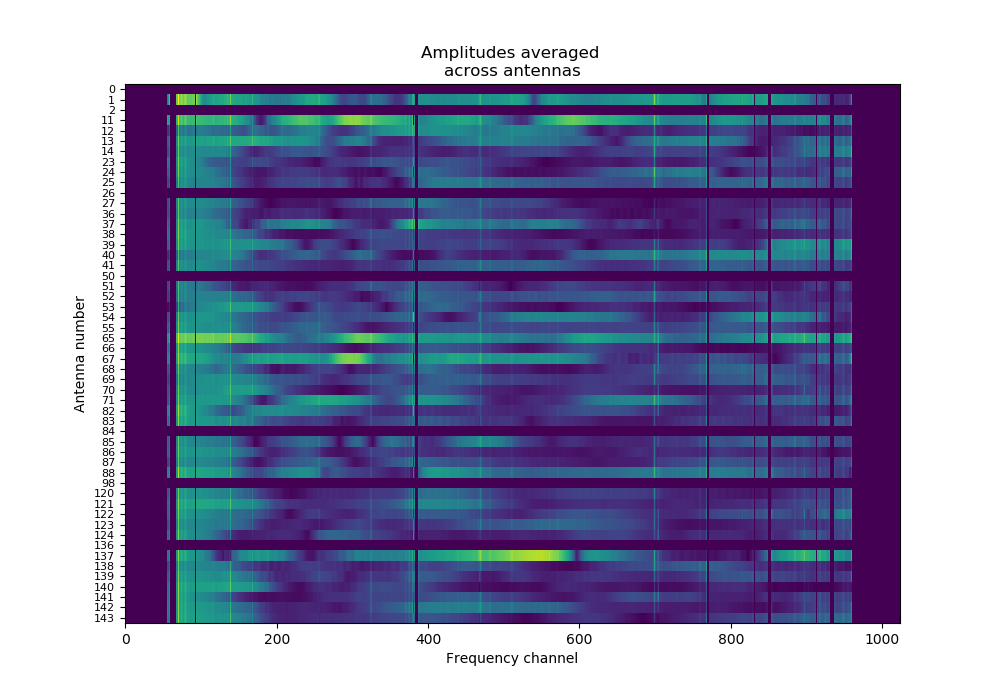

Text(0.5,1,'Amplitudes averaged \nacross antennas')

In [69]:
V_k = np.zeros((len(uvxy.antenna_numbers),len(uvxy.antenna_numbers),uvxy.Nfreqs),dtype='complex')
print V_k.shape

ant_dict = {x: i for i,x in enumerate(uvxy.antenna_numbers)}

for i,ant1 in enumerate(uvxy.ant_2_array):
    ant2 = uvxy.ant_1_array[i]
    if (ant1==ant2):
        x = uvxy.data_array[i,0,:,0]
        V_k[ant_dict[ant1]][ant_dict[ant2]] = x
        
print V_k.shape
testing = np.sum(V_k/52.,axis=1)
#testing = testing[:,None]
print testing.shape

plt.figure(figsize=(10,7))

plt.imshow(np.abs(testing),aspect='auto',norm=SymLogNorm(vmin=0,vmax=1,linthresh=.1))
plt.yticks(np.arange(len(uvxy.antenna_numbers)), uvxy.antenna_numbers, fontsize=8)
plt.xlabel('Frequency channel')
plt.ylabel('Antenna number')
plt.title('Amplitudes averaged \nacross antennas')

<IPython.core.display.Javascript object>


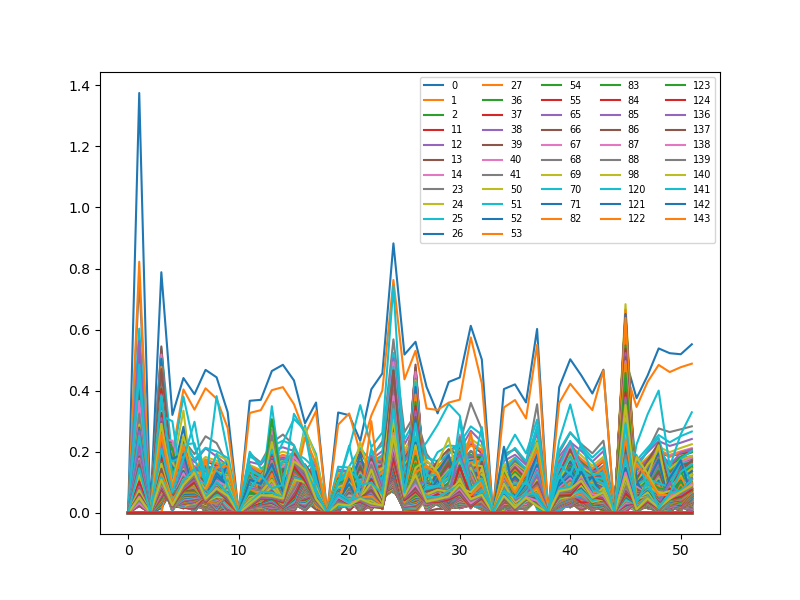

In [83]:
plt.figure(figsize=(8,6))
plt.plot(np.abs(testing))
plt.legend(uvxy.antenna_numbers, ncol=5,fontsize=7)


In [210]:
"""

[x] Fix the matrix plotter
[\] Look at the pre-LST files to see when 84 gets flagged

"""

'\n\n[x] Fix the matrix plotter\n[\\] Look at the pre-LST files to see when 84 gets flagged\n\n'